<a href="https://colab.research.google.com/github/Thanveerahmd/Fuzzy-Logic/blob/main/Fuzzy_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Relevant Libraries and Functions

In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import scipy
from scipy.integrate import quad
import math
from math import *

In [ ]:
def checkEquivalence(size,tolerance):
  equivalence = True
  for number in range(size):
    for val in range(size):
      
      if number != val :
        for v in range(size):
      
          if(tolerance[number][v] < min(tolerance[number][val], tolerance[:,val][v])):
            print("Not equivalence") 
            print()
            print("(xi xj)"+"( "+str(number+1)+" , "+str(val+1)+" ) :"+str(tolerance[number][val]))
            print("(xj xk)"+"( "+str(val+1)+" , "+str(v+1)+" ) :"+str(tolerance[:,val][v]))
            print("(xi xk)"+"( "+str(number+1)+" , "+str(v+1)+" ) :"+str(tolerance[number][v]))
            equivalence = False
            break

      if ( not equivalence):
        break

    if (equivalence):
      print("equivalence")
    else:
      break

In [ ]:
def triangular(x, abc ,m):
    """
    Triangular membership function generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    abc : 1d array, length 3
        Three-element vector controlling shape of triangular function.
        Requires a <= b <= c.

    Returns
    -------
    y : 1d array
        Triangular membership function.

    """
    assert len(abc) == 3, 'abc parameter must have exactly three elements.'
    a, b, c = np.r_[abc]     # Zero-indexing in Python
    assert a <= b and b <= c, 'abc requires the three elements a <= b <= c.'

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] =m*((x[idx] - a) / float(b - a))


    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] =m*( (c - x[idx]) / float(c - b))
    

    idx = np.nonzero(x == b)
    y[idx] = m


    return y

In [ ]:
def trapezoidal(x, abcd,k):
    """
    Trapezoidal membership function generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    abcd : 1d array, length 4
        Four-element vector.  Ensure a <= b <= c <= d.

    Returns
    -------
    y : 1d array
        Trapezoidal membership function.

    """
    assert len(abcd) == 4, 'abcd parameter must have exactly four elements.'
    a, b, c, d = np.r_[abcd]
    assert a <= b and b <= c and c <= d, 'abcd requires the four elements \
                                          a <= b <= c <= d.'
    y = np.multiply(np.ones(len(x)),k)


    idx = np.nonzero(x <= b)[0]
    y[idx] =  triangular(x[idx], np.r_[a, b, b],k)

    idx = np.nonzero(x >= c)[0]
    y[idx] =  triangular(x[idx], np.r_[c, c, d],k)

    idx = np.nonzero(x < a)[0]
    y[idx] = np.zeros(len(idx))

    idx = np.nonzero(x > d)[0]
    y[idx] = np.zeros(len(idx))

    return y

# Finding the similarity relation

In [ ]:
n, m = map(int, input().split()) # taking number of rows and column
fuzzyData = np.array([input().strip().split() for _ in range(n)], float)

3 3
.0 .1 .1
.2 .2 .4
.1 .2 .4


In [ ]:
print(fuzzyData)
tolerance_relation_matrix = np.zeros(shape=(m,m))
tolerance_relation_maxmin = np.zeros(shape=(m,m))

[[0.  0.1 0.1]
 [0.2 0.2 0.4]
 [0.1 0.2 0.4]]


## Cosine amplitude method

In [ ]:
for number in range(m):
  tolerance_relation_matrix[number][number] = 1
  for val in range(number):
    print("finding r "+str(val+1)+str(number+1))
    print("----------------------------------")
    print(fuzzyData[:,val])
    print(fuzzyData[:,number])
    print("")

    d = np.sum(np.multiply(fuzzyData[:,val], fuzzyData[:,number]))
    a = np.sum(np.power(fuzzyData[:,val], 2))
    b = np.sum(np.power(fuzzyData[:,number], 2)) 
    p = math.sqrt(a*b)

    print("d : "+str(round(d, 2)))
    print("a : "+str(round(a, 2)))
    print("b : "+str(round(b, 2)))
    print("p : "+str(round(p, 2)))
    print("")
   
    r = d/p

    tolerance_relation_matrix[val][number] = round(r, 3)
    tolerance_relation_matrix[number][val] = round(r, 3)

    print(str(round(r, 3)))
    print("")


finding r 12
----------------------------------
[0.  0.2 0.1]
[0.1 0.2 0.2]

d : 0.06
a : 0.05
b : 0.09
p : 0.07

0.894

finding r 13
----------------------------------
[0.  0.2 0.1]
[0.1 0.4 0.4]

d : 0.12
a : 0.05
b : 0.33
p : 0.13

0.934

finding r 23
----------------------------------
[0.1 0.2 0.2]
[0.1 0.4 0.4]

d : 0.17
a : 0.09
b : 0.33
p : 0.17

0.986



In [ ]:
print(tolerance_relation_matrix)

[[1.    0.894 0.934]
 [0.894 1.    0.986]
 [0.934 0.986 1.   ]]


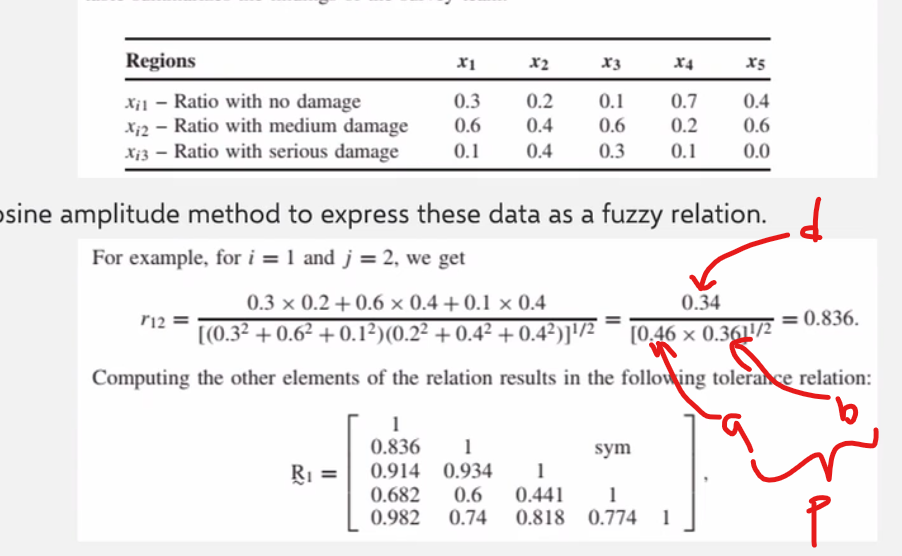

 **Finding Eqivalance**

In [ ]:
checkEquivalence(m,tolerance_relation_matrix)

Not equivalence

(xi xj)( 1 , 3 ) :0.934
(xj xk)( 3 , 2 ) :0.986
(xi xk)( 1 , 2 ) :0.894


In [ ]:
tolerance_relation_matrix1 = fuzz.maxmin_composition(tolerance_relation_matrix, tolerance_relation_matrix)
print(tolerance_relation_matrix1)
print()
checkEquivalence(m,tolerance_relation_matrix1)

[[1.    0.934 0.934]
 [0.934 1.    0.986]
 [0.934 0.986 1.   ]]

equivalence
equivalence
equivalence


In [ ]:
tolerance_relation_matrix2 = fuzz.maxmin_composition(tolerance_relation_matrix1, tolerance_relation_matrix1)
print(tolerance_relation_matrix2)
print()
checkEquivalence(m,tolerance_relation_matrix2)

[[1.    0.906 0.97  0.922]
 [0.906 1.    0.906 0.906]
 [0.97  0.906 1.    0.922]
 [0.922 0.906 0.922 1.   ]]

equivalence
equivalence
equivalence
equivalence


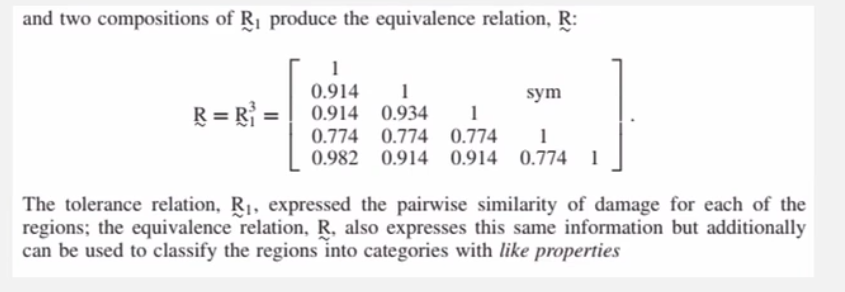

## Max–min method

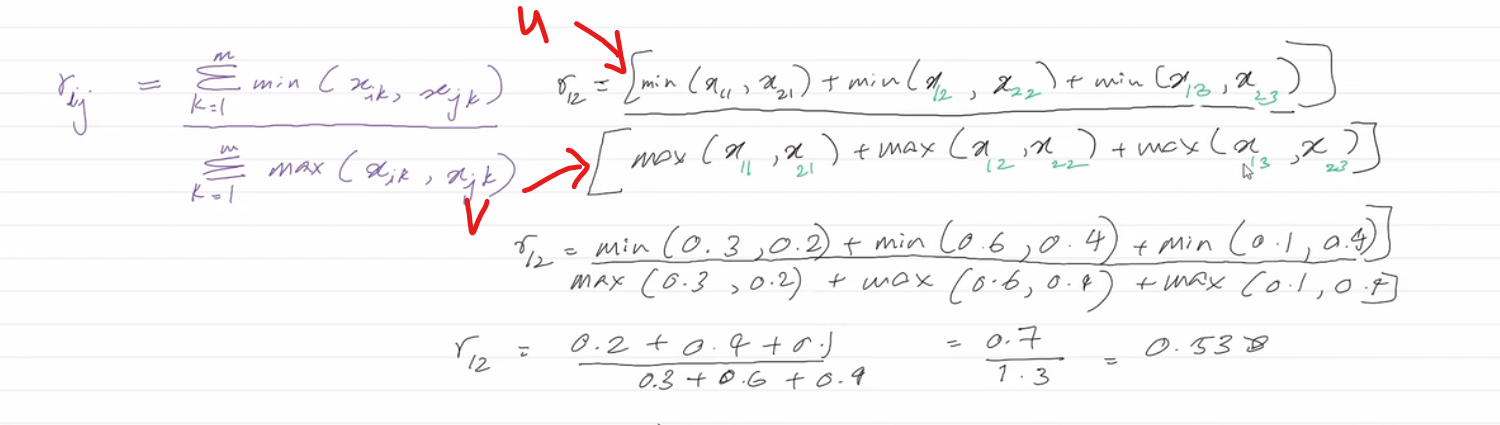

In [ ]:
X = np.arange(n)
Y = np.arange(n)

print(X)
print(Y)
print("")

for number in range(m):
  tolerance_relation_maxmin[number][number] = 1
  for val in range(number):
    print("finding r "+str(val+1)+str(number+1))
    print("----------------------------------")
  
    print("column")
    print(fuzzyData[:,val])
    print(fuzzyData[:,number])

    u = fuzz.fuzzy_and(X, fuzzyData[:,val], Y, fuzzyData[:,number])
    v = fuzz.fuzzy_or(X, fuzzyData[:,val], Y, fuzzyData[:,number])

    print("")

    print("u : "+str(u[1]))
    print("v : "+str(v[1]))
    print("")
    u_sum = np.sum(u[1])
    v_sum = np.sum(v[1])

    print("u_sum : "+str(u_sum))
    print("v_sum : "+str(v_sum))
    print("")
    r = u_sum/v_sum
    
    tolerance_relation_maxmin[val][number] = round(r, 3)
    tolerance_relation_maxmin[number][val] = round(r, 3)

    print(str(round(r, 3)))

    print("")

[0 1 2]
[0 1 2]

finding r 12
----------------------------------
column
[0.3 0.6 0.1]
[0.2 0.4 0.4]

u : [0.2 0.4 0.1]
v : [0.3 0.6 0.4]

u_sum : 0.7000000000000001
v_sum : 1.2999999999999998

0.538

finding r 13
----------------------------------
column
[0.3 0.6 0.1]
[0.1 0.6 0.3]

u : [0.1 0.6 0.1]
v : [0.3 0.6 0.3]

u_sum : 0.7999999999999999
v_sum : 1.2

0.667

finding r 23
----------------------------------
column
[0.2 0.4 0.4]
[0.1 0.6 0.3]

u : [0.1 0.4 0.3]
v : [0.2 0.6 0.4]

u_sum : 0.8
v_sum : 1.2000000000000002

0.667

finding r 14
----------------------------------
column
[0.3 0.6 0.1]
[0.7 0.2 0.1]

u : [0.3 0.2 0.1]
v : [0.7 0.6 0.1]

u_sum : 0.6
v_sum : 1.4

0.429

finding r 24
----------------------------------
column
[0.2 0.4 0.4]
[0.7 0.2 0.1]

u : [0.2 0.2 0.1]
v : [0.7 0.4 0.4]

u_sum : 0.5
v_sum : 1.5

0.333

finding r 34
----------------------------------
column
[0.1 0.6 0.3]
[0.7 0.2 0.1]

u : [0.1 0.2 0.1]
v : [0.7 0.6 0.3]

u_sum : 0.4
v_sum : 1.599999999999999

In [ ]:
print(tolerance_relation_maxmin)

[[1.    0.538 0.667 0.429 0.818]
 [0.538 1.    0.667 0.333 0.429]
 [0.667 0.667 1.    0.25  0.538]
 [0.429 0.333 0.25  1.    0.429]
 [0.818 0.429 0.538 0.429 1.   ]]


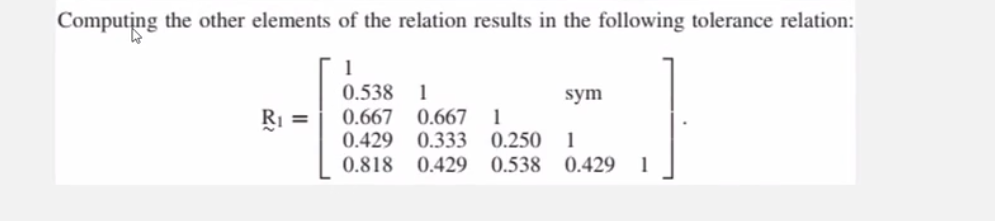

**Finding Eqivalance**

In [ ]:
checkEquivalence(m,tolerance_relation_maxmin)

Not equivalence

(xi xk)( 1 , 2 )
(xi xj)( 1 , 3 )
(xj xk)( 3 , 2 )


In [ ]:
tolerance_relation_maxmin1 = fuzz.maxmin_composition(tolerance_relation_maxmin, tolerance_relation_maxmin)
print(tolerance_relation_maxmin1)
print()
checkEquivalence(m,tolerance_relation_maxmin1)

[[1.    0.667 0.667 0.429 0.818]
 [0.667 1.    0.667 0.429 0.538]
 [0.667 0.667 1.    0.429 0.667]
 [0.429 0.429 0.429 1.    0.429]
 [0.818 0.538 0.667 0.429 1.   ]]

equivalence
Not equivalence

(xi xk)( 2 , 5 )
(xi xj)( 2 , 1 )
(xj xk)( 1 , 5 )


In [ ]:
tolerance_relation_maxmin2 = fuzz.maxmin_composition(tolerance_relation_maxmin1, tolerance_relation_maxmin1)
print(tolerance_relation_maxmin2)
print()
checkEquivalence(m,tolerance_relation_maxmin2)

[[1.    0.667 0.667 0.429 0.818]
 [0.667 1.    0.667 0.429 0.667]
 [0.667 0.667 1.    0.429 0.667]
 [0.429 0.429 0.429 1.    0.429]
 [0.818 0.667 0.667 0.429 1.   ]]

equivalence
equivalence
equivalence
equivalence
equivalence


# Finding Relations,Fuzzy compositions and Equivalence Relation

In [ ]:
a = np.array([0.1,0.5,1])
b = np.array([0.3,0.8])
mfz = np.array([0.4, 0.7,1])

## when relations are not given

In [ ]:
mfx = np.array([0.1,0.5,1])
mfy = np.array([0.3,0.8])
mfz = np.array([0.4, 0.7,1])

mfr = fuzz.cartprod(mfx, mfy)
print(mfr)
print("")
mfs = fuzz.cartprod(mfy, mfz)
print(mfs)
print("")

print("max–min composition")
print("")
mft1 = fuzz.maxmin_composition(mfr, mfs)
print(mft1)
print("")

print("max–product composition")
print("")
mft2 = fuzz.maxprod_composition(mfr, mfs)
print(mft2)
print("")

[[0.1 0.1]
 [0.3 0.5]
 [0.3 0.8]]

[[0.3 0.3 0.3]
 [0.4 0.7 0.8]]

max–min composition

[[0.1 0.1 0.1]
 [0.4 0.5 0.5]
 [0.4 0.7 0.8]]

max–product composition

[[0.04 0.07 0.08]
 [0.2  0.35 0.4 ]
 [0.32 0.56 0.64]]



## when relations are given

In [ ]:
n1, m1 = map(int, input().split()) # taking number of rows and column
mfr = np.array([input().strip().split() for _ in range(n1)], float)

n2, m2 = map(int, input().split()) # taking number of rows and column
mfs = np.array([input().strip().split() for _ in range(n2)], float)


print("max–min composition")
print("")
mft1 = fuzz.maxmin_composition(mfr, mfs)
print(mft1)
print("")

print("max–product composition")
print("")
mft2 = fuzz.maxprod_composition(mfr, mfs)
print(mft2)
print("")

2 3
1 .2 .0
.4 1 .6
3 2
1 .3
.5 1
.2 .3
max–min composition

[[1.  0.3]
 [0.5 1. ]]

max–product composition

[[1.  0.3]
 [0.5 1. ]]



## checking the Equivalence relation

In [ ]:
n3, m3 = map(int, input().split()) # taking number of rows and column
tolerance_m = np.array([input().strip().split() for _ in range(n3)], float)
print(tolerance_m)

5 5 
1 .8 0 .1 .2 
.8 1 .4 0 .9
0 .4 1 0 0
.1 0 0 1 .5
.2 .9 0 .5 1
[[1.  0.8 0.  0.1 0.2]
 [0.8 1.  0.4 0.  0.9]
 [0.  0.4 1.  0.  0. ]
 [0.1 0.  0.  1.  0.5]
 [0.2 0.9 0.  0.5 1. ]]


val (xi , xk ) >= min {val(xi , xj ) , val(xj , xk ) }

In [ ]:
checkEquivalence(5,tolerance_m)

Not equivalence

(xi xk)( 1 , 3 )
(xi xj)( 1 , 2 )
(xj xk)( 2 , 3 )


In [ ]:
tolerance_m1 = fuzz.maxmin_composition(tolerance_m, tolerance_m)
print(tolerance_m1)
print()
checkEquivalence(5,tolerance_m1)

[[1.  0.8 0.4 0.2 0.8]
 [0.8 1.  0.4 0.5 0.9]
 [0.4 0.4 1.  0.  0.4]
 [0.2 0.5 0.  1.  0.5]
 [0.8 0.9 0.4 0.5 1. ]]

Not equivalence

(xi xk)( 1 , 4 )
(xi xj)( 1 , 2 )
(xj xk)( 2 , 4 )


In [ ]:
tolerance_m2 = fuzz.maxmin_composition(tolerance_m1, tolerance_m1)
print(tolerance_m2)
print()
checkEquivalence(5,tolerance_m2)

[[1.  0.8 0.4 0.5 0.8]
 [0.8 1.  0.4 0.5 0.9]
 [0.4 0.4 1.  0.4 0.4]
 [0.5 0.5 0.4 1.  0.5]
 [0.8 0.9 0.4 0.5 1. ]]

equivalence
equivalence
equivalence
equivalence
equivalence


# Ploting the defuzzified quantity and centeroid 

## Example 1

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8])
a1 = trapezoidal(x, [0, 2, 3, 4],.7)
a2 = trapezoidal(x, [2, 3, 4, 6],1)

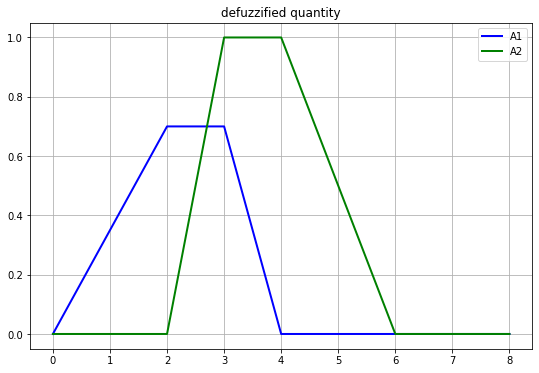

In [ ]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(9,6))

ax0.plot(x, a1, 'b',linewidth =2 , label = 'A1')
ax0.plot(x, a2, 'g',linewidth =2 , label = 'A2')
ax0.set_title('defuzzified quantity')
plt.grid(True)
ax0.legend()

###Integration

In [ ]:
def g1(x):
    return 0.35*(x)

def g2(x):
    return .7

def g3(x):
    return (x - 2)

def g4(x):
    return 1

def g5(x):
    return 3 - 0.5*(x)

# def g6(x):
#     return 

print(quad(g1, 0, 2)[0])
print(quad(g2, 2, 2.7)[0])
print(quad(g3, 2.7, 3)[0])
print(quad(g4, 3, 4)[0])
print(quad(g5, 4, 6)[0])

down_cal = sum([quad(g1, 0, 2)[0],quad(g2, 2, 2.7)[0],quad(g3, 2.7, 3)[0],quad(g4, 3, 4)[0],quad(g5, 4, 6)[0]])
print(down_cal)
#print(quad(p, 0, 2))

In [ ]:
def f1(x):
    return 0.35*(x**2)

def f2(x):
    return .7*x

def f3(x):
    return (x**2 - 2*x)

def f4(x):
    return x

def f5(x):
    return 3*x - 0.5*(x**2)

# def f6(x):
#     return 

print(quad(f1, 0, 2)[0])
print(quad(f2, 2, 2.7)[0])
print(quad(f3, 2.7, 3)[0])
print(quad(f4, 3, 4)[0])
print(quad(f5, 4, 6)[0])

up_cal = sum([quad(f1, 0, 2)[0],quad(f2, 2, 2.7)[0],quad(f3, 2.7, 3)[0],quad(f4, 3, 4)[0],quad(f5, 4, 6)[0]])

print(up_cal)
 

In [ ]:
print(up_cal/down_cal)

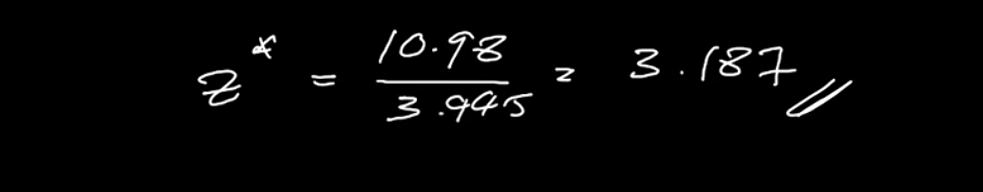

##Example 2  | 5 functions

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
x1 = np.array([0,1,2,3,3.5,4,4.5,5,6,7,8,9])
y = np.array([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0 ,1.2])

a1 = trapezoidal(x, [0, 1, 4, 5],.3)
a2 = trapezoidal(x, [3, 4, 6, 7],0.5)
a3 = trapezoidal(x, [4, 5,7,8],1)

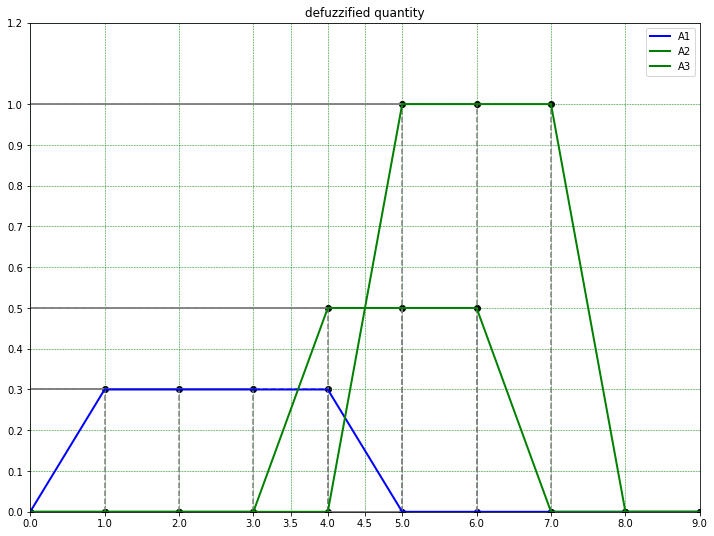

In [ ]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,9))

for x_,y_ in zip(x, a1):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')

for x_,y_ in zip(x, a2):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')

for x_,y_ in zip(x, a3):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')


ax0.plot(x, a1, 'b',linewidth =2 , label = 'A1')
ax0.plot(x, a2, 'g',linewidth =2 , label = 'A2')
ax0.plot(x, a3, 'g',linewidth =2 , label = 'A3')

plt.scatter(x, a1, color='black')
plt.scatter(x, a2, color='black')
plt.scatter(x, a3, color='black')
ax0.set_title('defuzzified quantity')
plt.margins(x=0, y=0)

plt.xticks(x1)
plt.yticks(y)

plt.grid(True)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax0.legend()

## Example 3 (2020) 8 functions

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
x1 = np.array([0,1,2,3,3.2,4,4.4,5,6,7,8,9,10])
y = np.array([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0 ,1.2])

a1 = trapezoidal(x, [0, 2, 3, 4],.5)
a2 = triangular(x, [2, 4, 5],.7)
a3 = trapezoidal(x, [4,5,7,9],1)

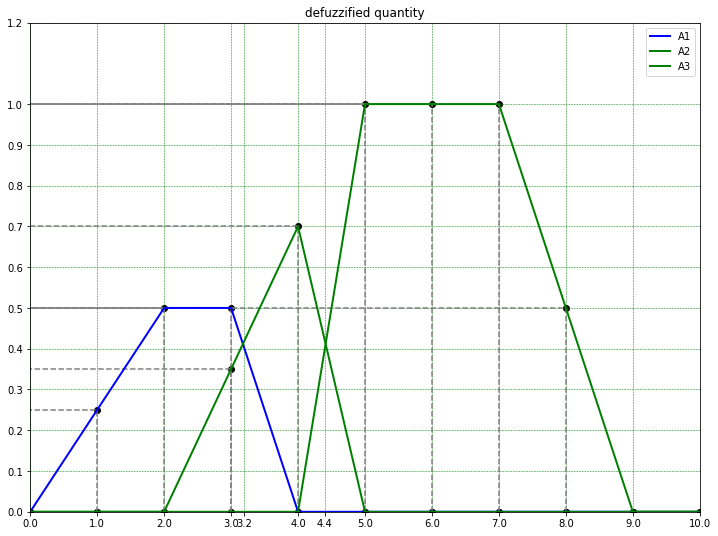

In [ ]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,9))

for x_,y_ in zip(x, a1):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')

for x_,y_ in zip(x, a2):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')

for x_,y_ in zip(x, a3):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')


ax0.plot(x, a1, 'b',linewidth =2 , label = 'A1')
ax0.plot(x, a2, 'g',linewidth =2 , label = 'A2')
ax0.plot(x, a3, 'g',linewidth =2 , label = 'A3')

plt.scatter(x, a1, color='black')
plt.scatter(x, a2, color='black')
plt.scatter(x, a3, color='black')
ax0.set_title('defuzzified quantity')
plt.margins(x=0, y=0)

plt.xticks(x1)
plt.yticks(y)

plt.grid(True)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax0.legend()

In [ ]:
def g1(x):
    return (.25*x)

def g2(x):
    return (.5)

def g3(x):
    return (2.8-.7*x)

def g4(x):
    return (.35*x-.7)

def g5(x):
    return (3.5-.7*x)

def g6(x):
    return (x-4)

def g7(x):
    return (1)

def g8(x):
    return (4.5-.5*x)

w1 = quad(g1,0,2 )[0]
w2 = quad(g2,2,3 )[0]
w3 = quad(g3,3,3.2 )[0]
w4 = quad(g4,3.2,4 )[0]
w5 = quad(g5,4,4.5 )[0]
w6 = quad(g6,4.5,5 )[0]
w7 = quad(g7,5,7 )[0]
w8 = quad(g8,7,9 )[0]

print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print(w6)
print(w7)
print(w8)
print()

down_cal = sum([w1,w2,w3,w4,w5,w6,w7,w8])
print(down_cal)

print()

def f1(x):
    return x*g1(x)

def f2(x):
    return x*g2(x)

def f3(x):
    return x*g3(x)

def f4(x):
    return x*g4(x)

def f5(x):
    return x*g5(x)

def f6(x):
    return x*g6(x)

def f7(x):
    return x*g7(x)

def f8(x):
    return x*g8(x)

# def g6(x):
#     return 

l1 = quad(f1,0,2  )[0]
l2 = quad(f2,2,3 )[0]
l3 = quad(f3,3,3.2 )[0]
l4 = quad(f4,3.2,4)[0]
l5 = quad(f5,4,4.5  )[0]
l6 = quad(f6,4.5,5 )[0]
l7 = quad(f7,5,7 )[0]
l8 = quad(f8,7,9 )[0]

print(l1)
print(l2)
print(l3)
print(l4)
print(l5)

up_cal = sum([l1,l2,l3,l4,l5,l6,l7,l8])
print()
print(up_cal)
 

0.5
0.5
0.12600000000000008
0.44799999999999984
0.2625000000000001
0.375
2.0
0.9999999999999999

5.2115

0.6666666666666667
1.25
0.39013333333333367
1.627733333333333
1.1083333333333338

26.501199999999997


In [ ]:
print(up_cal/down_cal)

5.085138635709488


## 2019 problem 

In [ ]:
x = np.array([130,140,150,155,160,170,180,190])
a1 = triangular(x, [140,150,160],1)
a2 = trapezoidal(x, [150,160,170,180],1)

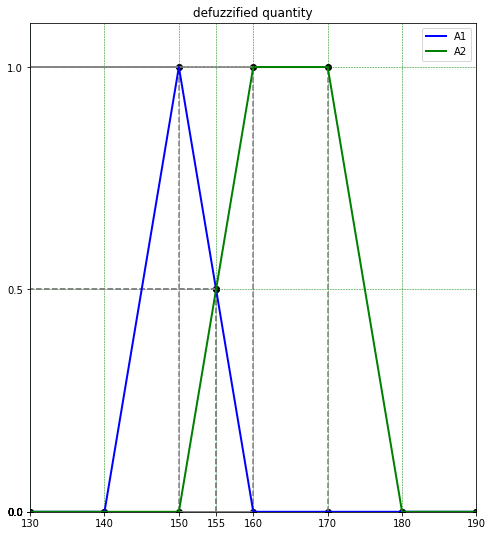

In [ ]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(8,9))

for x_,y_ in zip(x, a1):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')

for x_,y_ in zip(x, a2):
    plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')

# for x_,y_ in zip(x, a3):
#     plt.plot([x_,x_,0], [0,y_,y_], color='grey', linestyle='--')


ax0.plot(x, a1, 'b',linewidth =2 , label = 'A1')
ax0.plot(x, a2, 'g',linewidth =2 , label = 'A2')
#ax0.plot(x, a3, 'g',linewidth =2 , label = 'A3')

plt.scatter(x, a1, color='black')
plt.scatter(x, a2, color='black')
#plt.scatter(x, a3, color='black')
ax0.set_title('defuzzified quantity')
plt.margins(x=0, y=0)

plt.xticks(x)
plt.yticks(a1)
plt.axis([x[0], x[len(x)-1], 0, 1.1])

plt.grid(True)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax0.legend()

In [ ]:
def g1(x):
    return (.1*x-14)

def g2(x):
    return (16-.1*x)

def g3(x):
    return (.1*x-15)

def g4(x):
    return (1)

def g5(x):
    return (18-.1*x)


w1 = quad(g1, 140, 150)[0]
w2 = quad(g2, 150, 155)[0]
w3 = quad(g3, 155, 160)[0]
w4 = quad(g4, 160, 170)[0]
w5 = quad(g5, 170, 180)[0]

print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print()

down_cal = sum([w1,w2,w3,w4,w5])
print(down_cal)

print()

def f1(x):
    return x*g1(x)

def f2(x):
    return x*g2(x)

def f3(x):
    return x*g3(x)

def f4(x):
    return x*g4(x)

def f5(x):
    return x*g5(x)

# def g6(x):
#     return 

l1 = quad(f1, 140, 150)[0]
l2 = quad(f2, 150, 155)[0]
l3 = quad(f3, 155, 160)[0]
l4 = quad(f4, 160, 170)[0]
l5 = quad(f5, 170, 180)[0]

print(l1)
print(l2)
print(l3)
print(l4)
print(l5)

up_cal = sum([l1,l2,l3,l4,l5])

print(up_cal)
 

5.000000000000008
3.749999999999996
3.7500000000000044
10.0
4.999999999999989

27.499999999999996

733.3333333333344
570.8333333333327
591.6666666666673
1650.0
866.6666666666647
4412.499999999999


In [ ]:
print(up_cal/down_cal)

160.45454545454544


## 2022 problem

In [ ]:
def g1(x):
    return (.1*x-14)

def g2(x):
    return (16-.1*x)

def g3(x):
    return (.1*x-15)

def g4(x):
    return (1)

def g5(x):
    return (18-.1*x)

# def g6(x):
#     return ()

# def g7(x):
#     return ()

# def g8(x):
#     return ()

t1 = 140
t2 =150
t3 =155
t4 =160
t5 =170
t6 =180
# t7 =5
# t8 =7
# t9 =9

w1 = quad(g1,t1,t2 )[0]
w2 = quad(g2,t2,t3 )[0]
w3 = quad(g3,t3,t4 )[0]
w4 = quad(g4,t4,t5 )[0]
w5 = quad(g5,t5,t6 )[0]


print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print()

down_cal = sum([w1,w2,w3,w4,w5])
print(down_cal)

print()

def f1(x):
    return x*g1(x)

def f2(x):
    return x*g2(x)

def f3(x):
    return x*g3(x)

def f4(x):
    return x*g4(x)

def f5(x):
    return x*g5(x)

# def f6(x):
#     return x*g6(x)

# def f7(x):
#     return x*g7(x)

# def f8(x):
#     return x*g8(x)

# def g6(x):
#     return 

l1 = quad(f1,t1,t2 )[0]
l2 = quad(f2,t2,t3 )[0]
l3 = quad(f3,t3,t4 )[0]
l4 = quad(f4,t4,t5 )[0]
l5 = quad(f5,t5,t6 )[0]
# l6 = quad(f6,t6,t7 )[0]
# l7 = quad(f7,t7,t8 )[0]
# l8 = quad(f8,t8,t9 )[0]

print(l1)
print(l2)
print(l3)
print(l4)
print(l5)

up_cal = sum([l1,l2,l3,l4,l5])
print()
print(up_cal)
 

5.000000000000008
3.749999999999996
3.7500000000000044
10.0
4.999999999999989

27.499999999999996

733.3333333333344
570.8333333333327
591.6666666666673
1650.0
866.6666666666647

4412.499999999999


In [ ]:
print(up_cal/down_cal)

160.45454545454544


# Q2 Ploting lambda 

In [ ]:
def q(x):
  return 1/(1+2*(x-5)**2)

def e(x):
  return 1/pow(3, x)

value = 6
arr = np.arange(value)
arr1 = np.zeros(shape=(value,))
arr2 = np.zeros(shape=(value,))

for x in arr:
  print("x : "+str(x))
  print(round(q(x), 3)) 
  arr1[x] = round(q(x), 3)
  print(round(e(x), 3))
  arr2[x] = round(e(x), 3)
  print()

print(arr1)
print(arr2)

x : 0
0.02
1.0

x : 1
0.03
0.333

x : 2
0.053
0.111

x : 3
0.111
0.037

x : 4
0.333
0.012

x : 5
1.0
0.004

[0.02  0.03  0.053 0.111 0.333 1.   ]
[1.    0.333 0.111 0.037 0.012 0.004]


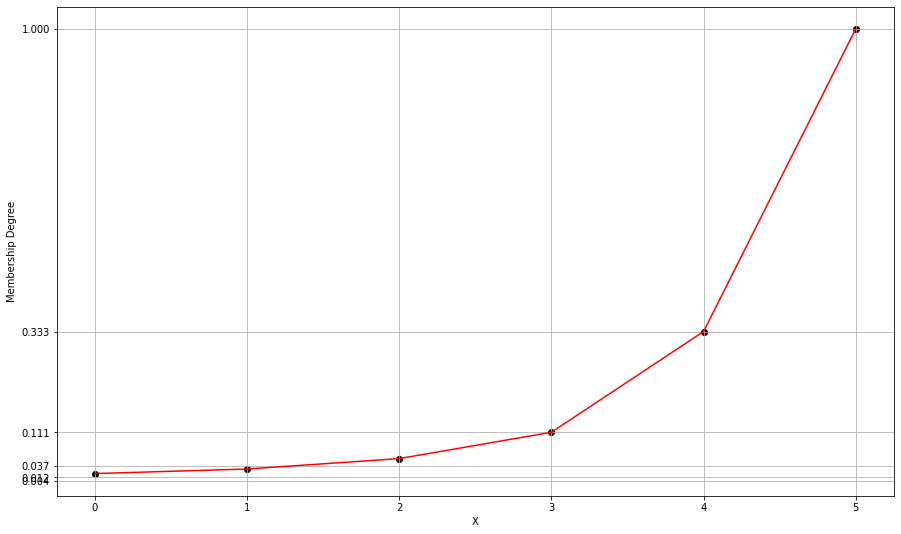

In [ ]:
plt.subplots(figsize=(15, 9))
plt.plot(arr, arr1, color='red')
plt.ylabel('Membership Degree')
plt.xlabel("X")
plt.grid(True)
plt.scatter(arr, arr1, color='black')
plt.yticks(arr2)
plt.show()

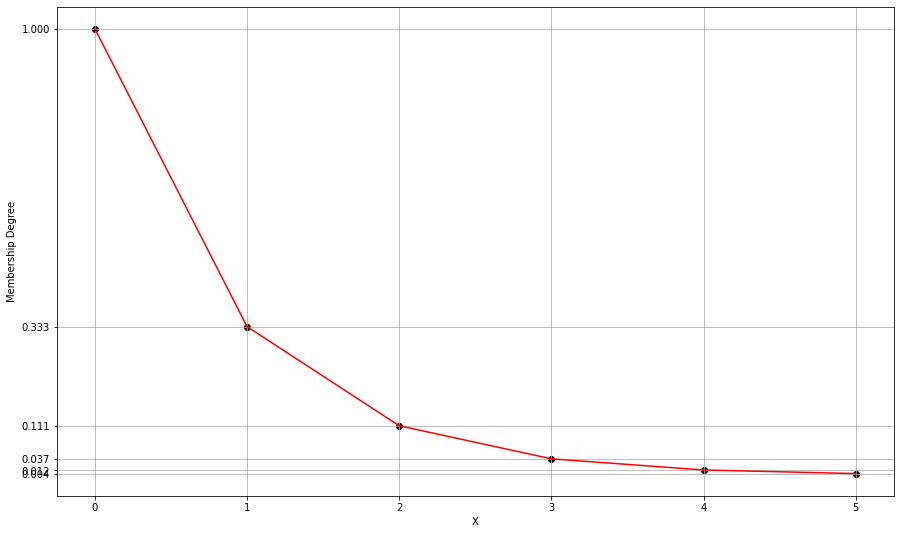

In [ ]:
plt.subplots(figsize=(15, 9))
plt.plot(arr, arr2, color='red')
plt.ylabel('Membership Degree')
plt.xlabel("X")
plt.scatter(arr, arr2, color='black')
plt.grid(True)
plt.yticks(arr2)
plt.show()